In [1]:
# RUN THIS CELL TO INSTALL THE REQUIRED PACKAGES
!pip install https://github.com/maciejkula/spotlight/archive/master.zip

     \ 372.5 kB 7.2 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spotlight: filename=spotlight-0.1.6-py3-none-any.whl size=33895 sha256=ff1b60f20fa46b362ae95526536913301b6d0fa919dcfae71cc0969e0a231da1
  Stored in directory: /tmp/pip-ephem-wheel-cache-7nt53pi2/wheels/97/29/2a/deeace90d6276201702ba614d15ccb6569acf1863478dd3f15
Successfully built spotlight


In [28]:
from spotlight.datasets.movielens import get_movielens_dataset

dataset = get_movielens_dataset(variant='100K')
dataset

<Interactions dataset (944 users x 1683 items x 100000 interactions)>

In [29]:
import pandas as pd

df = pd.DataFrame({
    'user_id': dataset.user_ids,
    'item_id': dataset.item_ids,
    'rating': dataset.ratings,
    'timestamp': dataset.timestamps
})

df


,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


In [30]:
df.isna().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0


I would like to see how many movies each user has rated

In [31]:
# Count the number of ratings for each user
ratings_count = df.groupby('user_id').size().reset_index(name='Rating_Count')

# Merge the ratings count back into the original DataFrame
df = df.merge(ratings_count, on='user_id', how='left')
df

,user_id,item_id,rating,timestamp,Rating_Count
0,196,242,3.0,881250949,39
1,186,302,3.0,891717742,92
2,22,377,1.0,878887116,128
3,244,51,2.0,880606923,238
4,166,346,1.0,886397596,20
...,...,...,...,...,...
99995,880,476,3.0,880175444,368
99996,716,204,5.0,879795543,269
99997,276,1090,1.0,874795795,518
99998,13,225,2.0,882399156,636


#### Observations and Ideas about the Dataset

A good idea would be to cluster users with similar ranks for the same movies. In this way we can have an idea of what other movies will someone new like if he also like some of a specific cluster.


# Data visualization and exploration

Lets have a look on the distribution of Ratings first

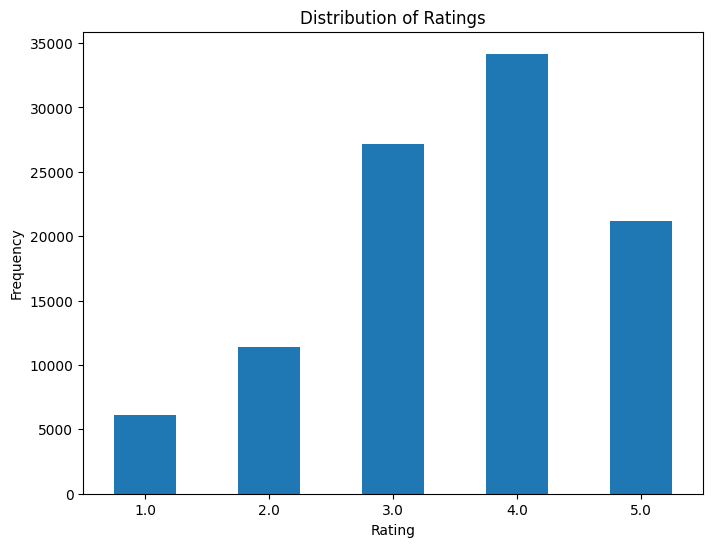

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


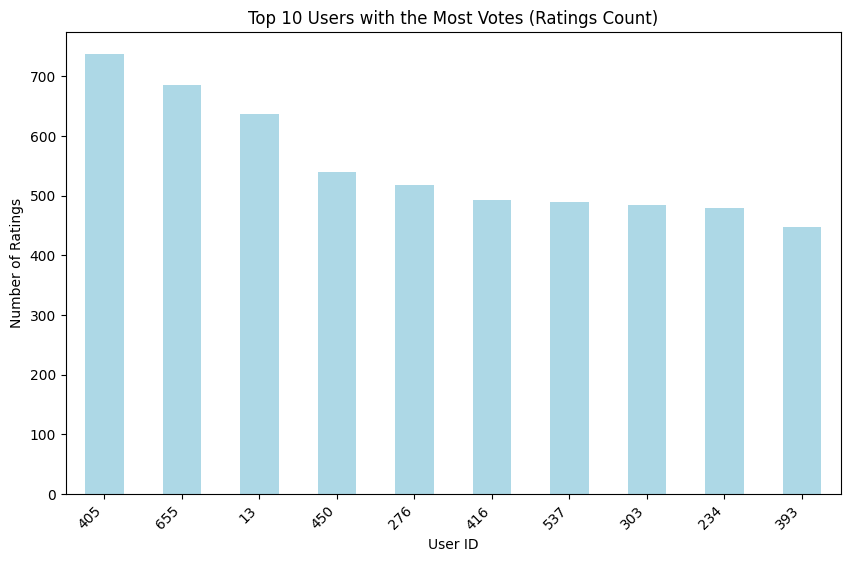

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the top 10 users with the highest Rating_Count
top_10_users = df.groupby('user_id')['Rating_Count'].max().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar', color='lightblue')

plt.title('Top 10 Users with the Most Votes (Ratings Count)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:

for user_id in top_10_users:
    print(f"Top 10 Movies for User {user_id}:")

    # Filter the data for the current user
    user_ratings = df[df['user_id'] == user_id]

    # Count the number of times each movie (item_id) has been rated by this user
    top_10_movies = user_ratings['item_id'].value_counts().nlargest(10)

    # Print the top 10 movies (item_id and their counts)
    for rank, (movie_id, count) in enumerate(top_10_movies.items(), start=1):
        print(f"{rank}. Movie ID: {movie_id} - Rated {count} times")

    print("\n" + "-" * 40)  # Print a separator between users


Top 10 Movies for User 405:
1. Movie ID: 56 - Rated 1 times
2. Movie ID: 794 - Rated 1 times
3. Movie ID: 770 - Rated 1 times
4. Movie ID: 851 - Rated 1 times
5. Movie ID: 1441 - Rated 1 times
6. Movie ID: 438 - Rated 1 times
7. Movie ID: 659 - Rated 1 times
8. Movie ID: 1147 - Rated 1 times
9. Movie ID: 745 - Rated 1 times
10. Movie ID: 45 - Rated 1 times

----------------------------------------
Top 10 Movies for User 655:
1. Movie ID: 274 - Rated 1 times
2. Movie ID: 31 - Rated 1 times
3. Movie ID: 902 - Rated 1 times
4. Movie ID: 118 - Rated 1 times
5. Movie ID: 566 - Rated 1 times
6. Movie ID: 658 - Rated 1 times
7. Movie ID: 1161 - Rated 1 times
8. Movie ID: 942 - Rated 1 times
9. Movie ID: 6 - Rated 1 times
10. Movie ID: 912 - Rated 1 times

----------------------------------------
Top 10 Movies for User 13:
1. Movie ID: 526 - Rated 1 times
2. Movie ID: 736 - Rated 1 times
3. Movie ID: 492 - Rated 1 times
4. Movie ID: 638 - Rated 1 times
5. Movie ID: 895 - Rated 1 times
6. Movie

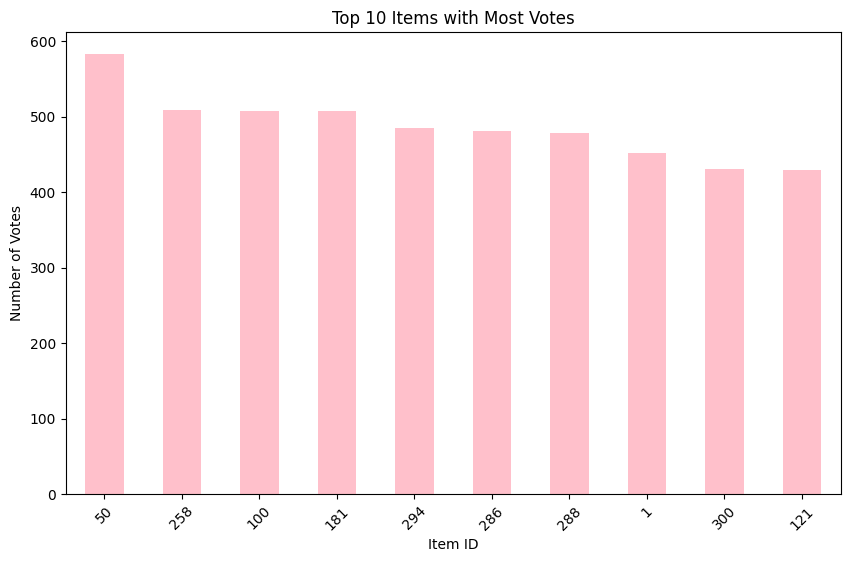

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

five_star_ratings = df[df['rating'] == 5]

# Step 2: Count how many times each movie (item_id) got a 5-star rating
five_star_movie_counts = five_star_ratings['item_id'].value_counts()

# Step 3: Get the top 10 movies with the highest number of 5-star ratings
top_10_movies_5_star = five_star_movie_counts.nlargest(10)

# Step 4: Plot the distribution of the top 10 movies with 5-star ratings
plt.figure(figsize=(10, 6))
top_10_movies_5_star.plot(kind='bar', color='lightcoral')

plt.title('Top 10 Movies with the Most 5-Star Ratings')
plt.xlabel('Movie (item_id)')
plt.ylabel('Number of 5-Star Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()
